# Covid Data Analysis

## Team 1: Iguanodon

### Members

- Ranjani Anjur Venkatraman(PM)
- Sharon Colson
- Cody Gardner

## Introduction

Analyzing recent covid data for multiple countries across the world

## Data

We retrived the required covid data from below three API's:

- Historical API : Retrived 30 days data of Cases, Deaths, and Recovered for mutiple countries across world

Link : https://disease.sh/v3/covid-19/historical/

- Vaccination API : Retrived vaccination information for mutiple countries across world

Link : https://disease.sh/v3/covid-19/vaccine/coverage/countries?lastdays=1

- Daily data API : Retrieved present day covid information

Link : https://disease.sh/v3/covid-19/countries/

## Coding

In [1]:
# Import Statements

import requests
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint
from datetime import datetime

## Data Retrieval , Manipulation and Cleaning

In [2]:
# Retrieving historical vaccination data for multiple countries

vaccination = requests.get("https://disease.sh/v3/covid-19/vaccine/coverage/countries?lastdays=30").json()
#pprint(vaccination)
#len(vaccination)

In [3]:
vaccine_days = []

vaccine_keys = vaccination[0]["timeline"].keys()

for value in vaccine_keys:
    vaccine_days.append(value)

#vaccine_days

In [4]:
country = []
vaccine =[]
v_date = []
for i in range(len(vaccination)): 
       
    
    for j in vaccine_days:
        
        try:
             
            vaccine.append(vaccination[i]["timeline"][j])
            country.append(vaccination[i]["country"])
            v_date.append(j)
        except:
            pass



In [5]:
# Historical vaccination dataframe

world_vaccination_df = pd.DataFrame({
                                "Country" : country,
                                "Date" : v_date,
                                "Vaccination_count" : vaccine
    
})

world_vaccination_df.head(2)

,Country,Date,Vaccination_count
0,Afghanistan,7/3/21,925686
1,Afghanistan,7/4/21,936288


In [6]:
# Retrieving historical Cases, Deaths and Recoverd data for multiple countries

world_data = requests.get("https://disease.sh/v3/covid-19/historical/").json()
#pprint(world_data)

In [7]:
world_days = []

world_keys = world_data[0]["timeline"]['cases'].keys()

for value in world_keys:
    world_days.append(value)

#world_days

In [8]:
country = []
cases =[]
deaths = []
recovered = []
w_date = []
for i in range(len(world_data)): 
       
    
    for j in world_days:
        
        try:
             
            cases.append(world_data[i]['timeline']['cases'][j])
            deaths.append(world_data[i]['timeline']['deaths'][j])
            recovered.append(world_data[i]['timeline']['recovered'][j])
            country.append(world_data[i]["country"])
            w_date.append(j)
        except:
            pass



In [9]:
# Historical world covid dataframe

world_covid_df = pd.DataFrame({
                              
                            
                                "Country" : country,
                                "Date" : w_date,
                                "Cases" : cases,
                                "Deaths" : deaths,
                                "Recovered" : recovered
                                
    
})

world_covid_df.head(5)

,Country,Date,Cases,Deaths,Recovered
0,Afghanistan,7/2/21,120216,4962,72700
1,Afghanistan,7/3/21,120216,4962,73635
2,Afghanistan,7/4/21,120216,4962,74480
3,Afghanistan,7/5/21,125937,5283,75314
4,Afghanistan,7/6/21,127464,5360,76218


In [10]:
# Merging historical world data with vaccination data. 
covid_df = pd.merge(world_covid_df,world_vaccination_df)
covid_df.head(3)



,Country,Date,Cases,Deaths,Recovered,Vaccination_count
0,Afghanistan,7/3/21,120216,4962,73635,925686
1,Afghanistan,7/4/21,120216,4962,74480,936288
2,Afghanistan,7/5/21,125937,5283,75314,915671


In [11]:
# Removing the duplicate values for certain countries

covid_df = covid_df.sort_values(['Country','Date','Cases']).drop_duplicates(subset=["Country","Date"],keep="last")


covid_df.head(5)

,Country,Date,Cases,Deaths,Recovered,Vaccination_count
7,Afghanistan,7/10/21,131586,5561,80226,955848
8,Afghanistan,7/11/21,131586,5561,81077,962093
9,Afghanistan,7/12/21,134653,5791,82586,971681
10,Afghanistan,7/13/21,134653,5791,82586,982882
11,Afghanistan,7/14/21,136643,5923,82586,1024168


In [12]:
# Sorting the data frame

covid_df['Date']=pd.to_datetime(covid_df.Date)
covid_df=covid_df.sort_values(['Country','Date'])
covid_df.head(5)

,Country,Date,Cases,Deaths,Recovered,Vaccination_count
0,Afghanistan,2021-07-03,120216,4962,73635,925686
1,Afghanistan,2021-07-04,120216,4962,74480,936288
2,Afghanistan,2021-07-05,125937,5283,75314,915671
3,Afghanistan,2021-07-06,127464,5360,76218,923566
4,Afghanistan,2021-07-07,129021,5415,77280,934463


## Covid Data

In [13]:
#Covid data frame containing historical data of cases, deaths, recoverd and vaccination information for mltiple countries

covid_df.head(5)

,Country,Date,Cases,Deaths,Recovered,Vaccination_count
0,Afghanistan,2021-07-03,120216,4962,73635,925686
1,Afghanistan,2021-07-04,120216,4962,74480,936288
2,Afghanistan,2021-07-05,125937,5283,75314,915671
3,Afghanistan,2021-07-06,127464,5360,76218,923566
4,Afghanistan,2021-07-07,129021,5415,77280,934463


## Group by Covid data

In [14]:
# Group by based on country
covid_groupby = covid_df.groupby('Country').median().reset_index()
covid_groupby.head(10)

,Country,Cases,Deaths,Recovered,Vaccination_count
0,Afghanistan,137853.0,5983.0,82586.0,1071711.0
1,Albania,132665.0,2456.0,130072.0,1067135.0
2,Algeria,152210.0,3922.0,104992.0,3118776.0
3,Andorra,14273.0,127.0,13844.0,74137.0
4,Angola,40707.0,954.0,34732.0,1586974.0
5,Antigua and Barbuda,1268.0,42.0,1224.0,65918.0
6,Argentina,4749443.0,101434.0,4379169.0,26934235.0
7,Armenia,227298.0,4559.0,218242.0,125108.0
8,Australia,20785.0,820.0,19895.0,9970746.0
9,Austria,653412.0,10728.0,639422.0,9034961.0


## Today's Vaccination information

In [15]:
# Pulling the current day vaccination information for multiple countries

#In vc.append always have the current date value

vaccination1 = requests.get("https://disease.sh/v3/covid-19/vaccine/coverage/countries?lastdays=1").json()
country = []
vc = []


for i in range(len(vaccination1)):
    c = vaccination1[i]['country']
    vc.append(vaccination1[i]['timeline']['8/1/21'])  
    
    country.append(c)


len(vc)



213

In [16]:
# Vaccination information for each country
vaccine_count = pd.DataFrame({"Country" : country,
                               "Vaccination_count": vc  })

vaccine_count.head()

,Country,Vaccination_count
0,Afghanistan,1381416
1,Albania,1190847
2,Algeria,3421279
3,Andorra,82349
4,Angola,1592537


## Today's Covid information

In [17]:
country = []
vaccine1 =[]
v_date1 = []
for i in range(len(vaccination1)): 
       
    
    for j in vaccine_days:
        
        try:
             
            vaccine1.append(vaccination1[i]["timeline"][j])
            country.append(vaccination1[i]["country"])
            v_date1.append(j)
        except:
            pass

In [18]:
url= "https://disease.sh/v3/covid-19/countries/"



world_active =[]
activePerOneMillion = []
cases = []
casesPerOneMillion = []
continent = []
w_country = []
lat = []
long = []
critical = []
criticalPerOneMillion = []
deaths = []
deathsPerOneMillion = []
population = []
recovered=[]
recoveredPerOneMillion = []
tests = []
testsPerOneMillion = []
todayCases = []
todayDeaths = []
todayRecovered = []
for c in country:
    try:
        response = requests.get(url + c).json()
        world_active.append(response['active'])
        activePerOneMillion.append(response['activePerOneMillion'])
        cases.append(response['cases'])
        casesPerOneMillion.append(response['casesPerOneMillion'])
        continent.append(response['continent'])
        w_country.append(response['country'])
        lat.append(response['countryInfo']['lat'])
        long.append(response['countryInfo']['long'])
        critical.append(response['critical'])
        criticalPerOneMillion.append(response['criticalPerOneMillion'])
        deaths.append(response['deaths'])
        deathsPerOneMillion.append(response['deathsPerOneMillion'])
        population.append(response['population'])
        recovered.append(response['recovered'])
        recoveredPerOneMillion.append(response['recoveredPerOneMillion'])
        tests.append(response['tests'])
        testsPerOneMillion.append(response['testsPerOneMillion'])
        todayCases.append(response['todayCases'])
        todayDeaths.append(response['todayDeaths'])
        todayRecovered.append(response['todayRecovered'])
    except:
        pass
        #print(f'{c} does not have data')


In [19]:


daily_covid_df = pd.DataFrame({
                                "Active" : world_active,
                                #"ActivePerOneMillion" : activePerOneMillion,
                                "Total_cases" : cases,
                                #"Total_casesPerOneMillion" : casesPerOneMillion,
                                "Continent" : continent,                                
                                "Country" : w_country,
                                "Latitude" : lat,
                                "Longitude" : long,
                                "Critical" : critical,
                                #"CriticalPerOneMillion" : criticalPerOneMillion,
                                "Overall_deaths" : deaths,
                                #"Overall_deathsPerOneMillion" : deathsPerOneMillion,
                                "Population" : population,
                                "Recovered" : recovered,
                                #"RecoveredPerOneMillion" : recoveredPerOneMillion,
                                "Tests" : tests,
                                #"TestsPerOneMillion" : testsPerOneMillion,
                                "TodayCases" : todayCases,
                                "TodayDeaths" : todayDeaths,
                                "TodayRecovered" : todayRecovered,
                                
                                
})

daily_covid_df.head(5)

,Active,Total_cases,Continent,Country,Latitude,Longitude,Critical,Overall_deaths,Population,Recovered,Tests,TodayCases,TodayDeaths,TodayRecovered
0,41762,147985,Asia,Afghanistan,33.0,65.0,1124,6774,39873886,99449,709930,0,0,0
1,421,133121,Europe,Albania,41.0,20.0,3,2457,2874391,130243,916777,0,0,0
2,52264,172564,Africa,Algeria,28.0,3.0,38,4291,44705952,116009,230861,0,0,0
3,340,14678,Europe,Andorra,42.5,1.6,0,128,77399,14210,193595,0,0,0
4,4402,42815,Africa,Angola,-12.5,18.5,8,1016,33966628,37397,681443,0,0,0


In [20]:
# Merging daily covid data with vaccination data
today_df = pd.merge(daily_covid_df,vaccine_count)

today_df.head(2)

,Active,Total_cases,Continent,Country,Latitude,Longitude,Critical,Overall_deaths,Population,Recovered,Tests,TodayCases,TodayDeaths,TodayRecovered,Vaccination_count
0,41762,147985,Asia,Afghanistan,33.0,65.0,1124,6774,39873886,99449,709930,0,0,0,1381416
1,421,133121,Europe,Albania,41.0,20.0,3,2457,2874391,130243,916777,0,0,0,1190847


In [21]:
# Creating subset with required columns
subset_today = today_df[['Country','Latitude','Longitude','Population','Continent']]
subset_today.head()

,Country,Latitude,Longitude,Population,Continent
0,Afghanistan,33.0,65.0,39873886,Asia
1,Albania,41.0,20.0,2874391,Europe
2,Algeria,28.0,3.0,44705952,Africa
3,Andorra,42.5,1.6,77399,Europe
4,Angola,-12.5,18.5,33966628,Africa


## Main Covid Dataframe

In [22]:
#Merging covid groupby data with subsset data to have all the required columns for analysis

main_covid_df = pd.merge(covid_groupby,subset_today)

# unvaccinated = population - vaccinated
main_covid_df['Unvaccination_count'] = main_covid_df['Population']- main_covid_df['Vaccination_count']
main_covid_df.head()

,Country,Cases,Deaths,Recovered,Vaccination_count,Latitude,Longitude,Population,Continent,Unvaccination_count
0,Afghanistan,137853.0,5983.0,82586.0,1071711.0,33.0,65.0,39873886,Asia,38802175.0
1,Albania,132665.0,2456.0,130072.0,1067135.0,41.0,20.0,2874391,Europe,1807256.0
2,Algeria,152210.0,3922.0,104992.0,3118776.0,28.0,3.0,44705952,Africa,41587176.0
3,Andorra,14273.0,127.0,13844.0,74137.0,42.5,1.6,77399,Europe,3262.0
4,Angola,40707.0,954.0,34732.0,1586974.0,-12.5,18.5,33966628,Africa,32379654.0


In [23]:
main_covid_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181 entries, 0 to 180
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Country              181 non-null    object 
 1   Cases                181 non-null    float64
 2   Deaths               181 non-null    float64
 3   Recovered            181 non-null    float64
 4   Vaccination_count    181 non-null    float64
 5   Latitude             181 non-null    float64
 6   Longitude            181 non-null    float64
 7   Population           181 non-null    int64  
 8   Continent            181 non-null    object 
 9   Unvaccination_count  181 non-null    float64
dtypes: float64(7), int64(1), object(2)
memory usage: 15.6+ KB


# Visualizations

## 1- Top 10 Vaccinated countries

In [24]:

most_vaccinated_df = main_covid_df.sort_values(['Vaccination_count'], ascending = False).head(10)
most_vaccinated_df['Rank'] = range(1,11,1)
most_vaccinated_df[['Rank','Country','Latitude','Longitude']]

,Rank,Country,Latitude,Longitude
34,1,China,35.0000,105.0000
73,2,India,20.0000,77.0000
170,3,USA,38.0000,-97.0000
23,4,Brazil,-10.0000,-55.0000
61,5,Germany,51.0000,9.0000
169,6,UK,54.0000,-2.0000
81,7,Japan,36.0000,138.0000
57,8,France,46.0000,2.0000
167,9,Turkey,39.0000,35.0000
79,10,Italy,42.8333,12.8333


In [25]:
# Dependencies
import gmaps
from config import gkey
# Google developer API key
gmaps.configure(api_key=gkey)
# Geocoordinates
loc = most_vaccinated_df[["Latitude", "Longitude"]]
Vaccination_count = most_vaccinated_df['Vaccination_count']

In [26]:
# Plotting heatmap based on vaccination and adding marker layer on top of the plot

fig = gmaps.figure(center=(45.0, -5.0), zoom_level=2)
heat = gmaps.heatmap_layer(loc, weights = Vaccination_count, dissipating=False, point_radius=8)
fig.add_layer(heat)


info_box_template = """
<dl>

<dt>Rank</dt><dd>{Rank}</dd>
<dt>Country</dt><dd>{Country}</dd>
</dl>
"""
# Store the DataFrame Row
# NOTE: be sure to update with your DataFrame name
Vaccine_info = [info_box_template.format(**row) for index, row in most_vaccinated_df.iterrows()]
locations = most_vaccinated_df[["Latitude", "Longitude"]]

marker = gmaps.marker_layer(locations, info_box_content = Vaccine_info)
fig.add_layer(marker)

fig


Figure(layout=FigureLayout(height='420px'))

#### Inference:

Top three vaccinated countries are China, India and USA respectively. 

## 2-Top 10 Un-Vaccinated countries with repect to population

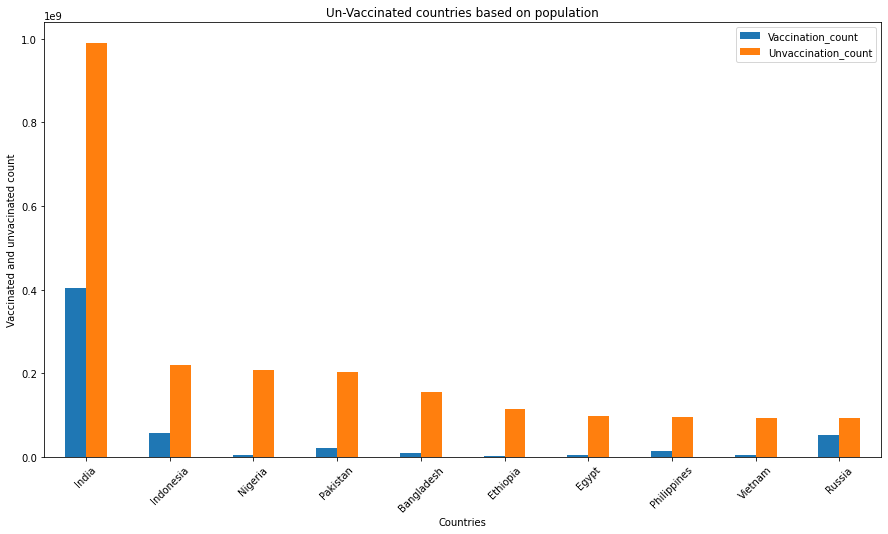

<Figure size 432x288 with 0 Axes>

In [27]:
Vaccinated_and_unvaccinated = main_covid_df[['Country',"Vaccination_count","Unvaccination_count"]].sort_values(['Unvaccination_count'], ascending = False).head(10)
multi_plot = Vaccinated_and_unvaccinated.plot(kind="bar", figsize=(15,8))

# PandasPlot.set_xticklabels() can be used to set the tick labels as well
multi_plot.set_xticklabels(Vaccinated_and_unvaccinated["Country"], rotation=45)
# Formatting the plot
plt.title("Un-Vaccinated countries based on population")
plt.xlabel("Countries")
plt.ylabel("Vaccinated and unvacinated count")
plt.show()
plt.tight_layout()



#### Inference:

Eventhough India is among the top 3 vaccinated countries, but with respect to population still there are more people who needs to be vaccinated.

## 3-Top 10 countries with highest covid cases

In [28]:
most_dailycases_df = main_covid_df.sort_values(['Cases'], ascending = False).head(10)
most_dailycases_df['Rank'] = range(1,11,1)
most_dailycases_df[['Rank','Country','Latitude','Longitude']]

,Rank,Country,Latitude,Longitude
170,1,USA,38.0000,-97.0000
73,2,India,20.0000,77.0000
23,3,Brazil,-10.0000,-55.0000
131,4,Russia,60.0000,100.0000
57,5,France,46.0000,2.0000
167,6,Turkey,39.0000,35.0000
169,7,UK,54.0000,-2.0000
6,8,Argentina,-34.0000,-64.0000
35,9,Colombia,4.0000,-72.0000
79,10,Italy,42.8333,12.8333


In [29]:

loc = most_dailycases_df[["Latitude", "Longitude"]]
Daily_New_case = most_dailycases_df['Cases']

In [30]:
fig = gmaps.figure(center=(45.0, -5.0), zoom_level=2)
heat = gmaps.heatmap_layer(loc, weights = Daily_New_case, dissipating=False, point_radius=8)
fig.add_layer(heat)

info_box_template = """
<dl>

<dt>Rank</dt><dd>{Rank}</dd>
<dt>Country</dt><dd>{Country}</dd>
</dl>
"""
# Store the DataFrame Row
# NOTE: be sure to update with your DataFrame name
cases_info = [info_box_template.format(**row) for index, row in most_dailycases_df.iterrows()]
locations = most_dailycases_df[["Latitude", "Longitude"]]

marker = gmaps.marker_layer(locations, info_box_content = cases_info)
fig.add_layer(marker)

fig



Figure(layout=FigureLayout(height='420px'))

#### Inference:
Current top three countries affected by highest covid cases are USA, India and Brazil respectively.

## 4-Total_Cases and Recovered Stack plot by region

In [31]:
region = main_covid_df.groupby("Continent").sum().reset_index()
region.head(2)

,Continent,Cases,Deaths,Recovered,Vaccination_count,Latitude,Longitude,Population,Unvaccination_count
0,Africa,6190358.0,157231.0,5348962.0,6.127482e+07,152.0603,836.8736,1295956097,1.234681e+09
1,Asia,58332370.5,830968.0,54845741.0,2.282397e+09,1152.7375,3418.3248,4577925887,2.295529e+09


In [32]:
region_df = region[['Continent','Cases','Deaths','Recovered','Vaccination_count','Population']]
region_df

,Continent,Cases,Deaths,Recovered,Vaccination_count,Population
0,Africa,6190358.0,157231.0,5348962.0,6.127482e+07,1295956097
1,Asia,58332370.5,830968.0,54845741.0,2.282397e+09,4577925887
2,Australia-Oceania,57437.0,1111.0,43016.0,1.209345e+07,42075090
3,Europe,49603367.0,1117315.0,27281926.0,5.935396e+08,747774883
4,North America,39554165.0,894950.0,3895642.0,4.665290e+08,592654789
5,South America,34501209.0,1051944.0,31523606.0,2.318469e+08,434293559


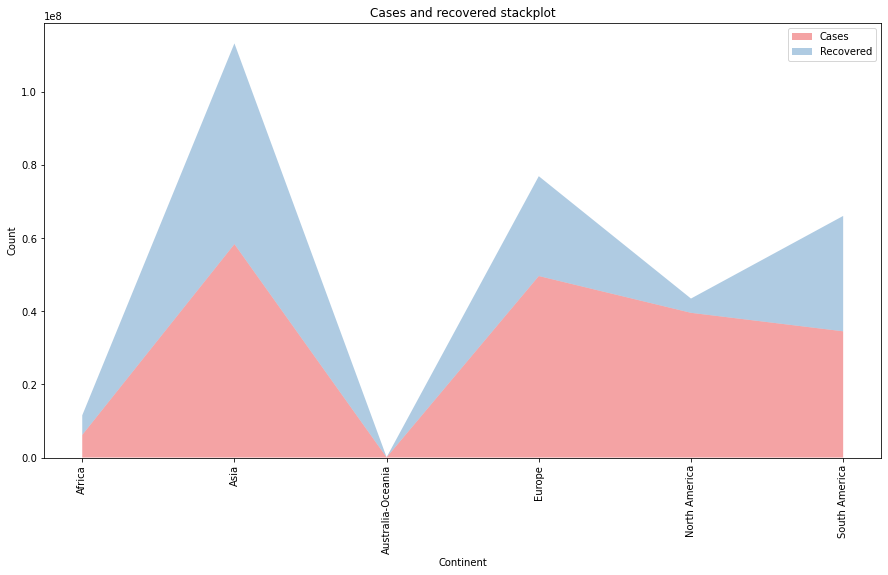

In [33]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(15,8))
pal = sns.color_palette("Set1")
plt.stackplot(region_df['Continent'],region_df["Cases"], region_df["Recovered"], labels=['Cases','Recovered'],colors=pal, alpha=0.4)
plt.legend(loc='upper right')
plt.title("Cases and recovered stackplot")
plt.xlabel("Continent")
plt.ylabel("Count")
plt.xticks(rotation=90)
#plt.figure(figsize=(15, 10))

plt.show()

#### Inference:
Above plot shows us that recovery rate is also higher compared to covid cases across continent

## 5-Overall Summary by region

<AxesSubplot:title={'center':'Stacked Bar Graph by Continent'}, xlabel='Continent'>

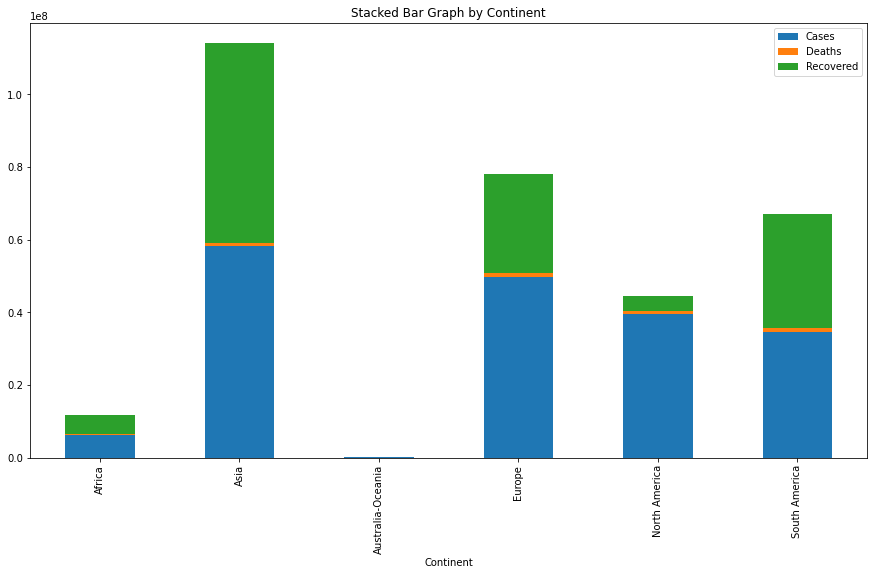

In [34]:

CCR = region[['Continent','Cases','Deaths','Recovered']]
CCR.plot(x='Continent', kind='bar', stacked=True,
        title='Stacked Bar Graph by Continent', figsize=(15, 8))



#### Inference:
From the above plot we can infer that Asia was badly affected by covid by also recovered more. 
Australia-Ocenia is least affected by covid cases compared to other continents

## 6-Correlation matrix

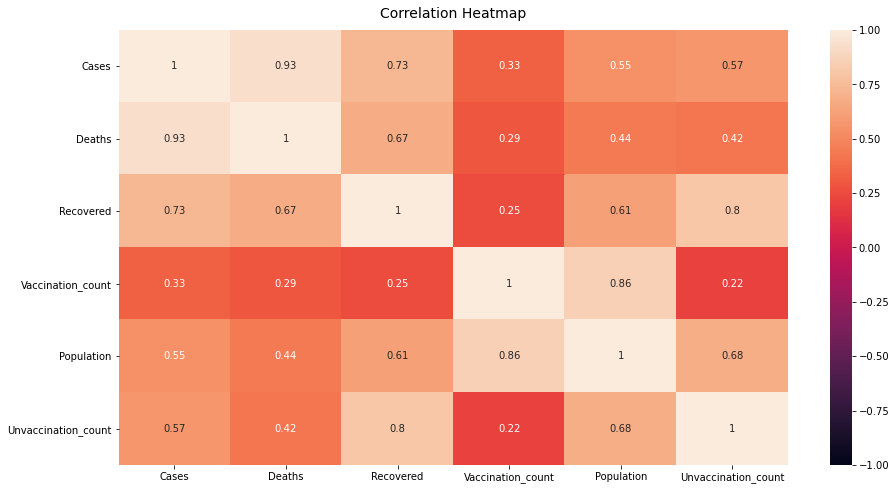

In [35]:
#plotting heat map to find the correlation between mutiple columns
plt.figure(figsize=(15, 8))
heatmap = sns.heatmap(main_covid_df[['Cases','Deaths','Recovered','Vaccination_count','Population','Unvaccination_count']].corr(), vmin=-1, vmax=1, annot=True)

heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);

#### Inference:
From the above matrix we can see that there is a hightest correlation between cases and deaths. High correlation have lighter color and value closer to 1. Least correlation have darker color in the matrix.

## 7-Top 10 countries with highest death count

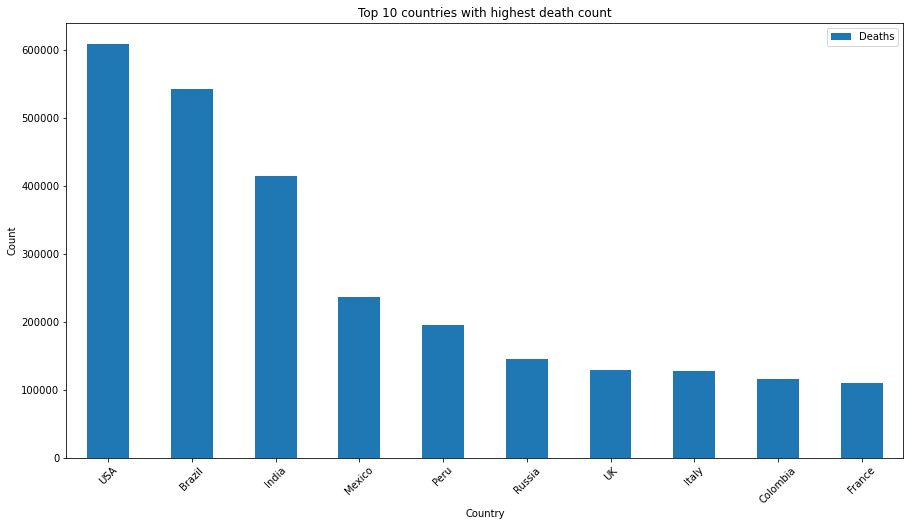

<Figure size 432x288 with 0 Axes>

In [36]:
Covid_Deaths_Country = main_covid_df[['Country',"Deaths"]].sort_values(['Deaths'], ascending = False).head(10)
multi_plot = Covid_Deaths_Country.plot(kind="bar", figsize=(15,8))

# PandasPlot.set_xticklabels() can be used to set the tick labels as well
multi_plot.set_xticklabels(Covid_Deaths_Country["Country"], rotation=45)
plt.title("Top 10 countries with highest death count")
plt.xlabel("Country")
plt.ylabel("Count")
plt.show()
plt.tight_layout()

#### Inference:
Current top three countries affected by highest covid deaths are USA, Brazil and India respectively.

## Linear Regression

The p-value for cases and vaccination is 4.600275394437839e-06


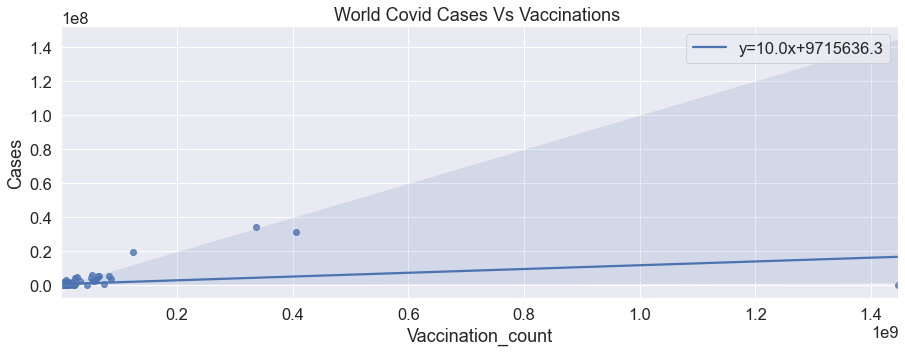

In [41]:
import seaborn as sns

import scipy.stats as st
from scipy.stats import linregress

fig, ax = plt.subplots(figsize=(15,5))


# get coeffs of linear fit
slope, intercept, r_value, p_value, std_err = st.linregress(main_covid_df['Cases'],
                                                            main_covid_df['Vaccination_count'])

p=sns.regplot(data=main_covid_df,
               x='Vaccination_count',
               y='Cases',
               line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)}
).set(title='World Covid Cases Vs Vaccinations ')
    
# plot legend
ax.legend()
leg=ax.get_legend()
L_labels=leg.get_texts()
                                  
sns.set_style(style="white")
sns.set(font_scale = 1.5)
locs, labels = plt.xticks()

print(f'The p-value for cases and vaccination is {p_value}')
plt.show()

#### Inference:

There is a positive correlation between cases and vaccination count

## Pearson’s Correlation Coefficient

### Hypothesis

#### - H0: Cases and Vaccination are independent
#### - H1: There is a dependency between Cases and Vaccination

In [42]:
import scipy.stats as st
from scipy.stats import linregress

correlation=round(st.pearsonr(main_covid_df['Vaccination_count'],main_covid_df['Cases'])[0],2)
p_value = st.pearsonr(main_covid_df['Vaccination_count'],main_covid_df['Cases'])[1]
print(f"The correlation between cases and vaccination is {correlation}")
print(f"The p-value for cases and vaccination is {p_value}")

The correlation between cases and vaccination is 0.33
The p-value for cases and vaccination is 4.600275394438548e-06


In [43]:
if p_value > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')

Probably dependent


#### Inference:

Since p-value is less than 0.05 we can reject null hypothesis and accept the alternate hypothesis that there is a dependency between cases and vaccination

## Trend of covid cases for last 30 days

In [44]:
cases_by_date_top_countries = (covid_df
                           .filter(['Date','Country','Cases'])
                           .query('Country in ["USA","India","UK"]')
                           .groupby(['Date','Country'])
                           .agg('sum')
                           .reset_index()
                           )

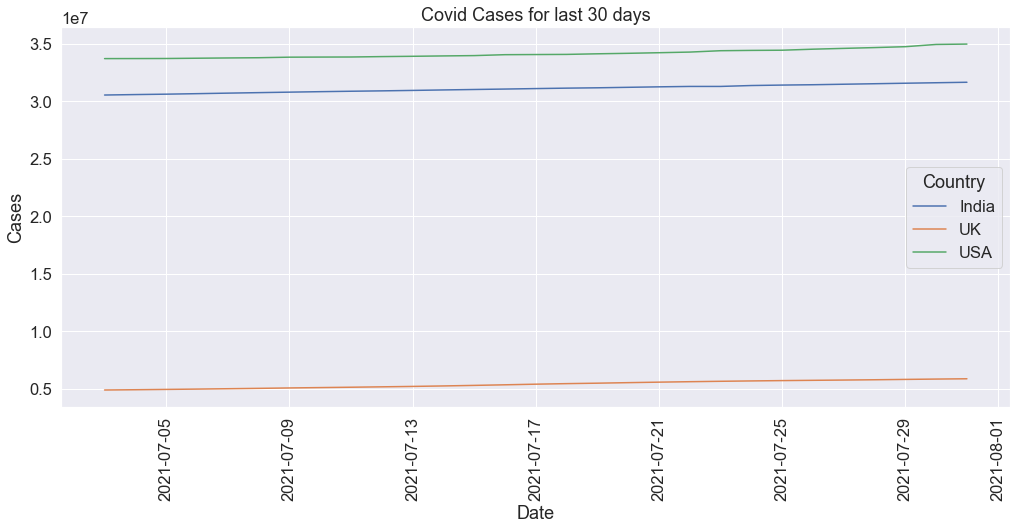

In [45]:
fig, ax = plt.subplots(figsize=(17,7))
sns.lineplot(data = cases_by_date_top_countries
             ,x = 'Date'
             ,y = 'Cases'
             ,hue = 'Country'
             ,legend=True
             ,ax=ax
             ).set(title='Covid Cases for last 30 days')
sns.set(font_scale = 1.5)
sns.set_style("whitegrid")
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.show()

#### Inference:

From the above plot we can see that for past 30 days there is a steady increase in cases for all the countries taken into consideration

## Augmented-dickey-fuller-test

#### - Tests whether a time series has a unit root






## Hypothesis

#### -  H0: a unit root is present (series is non-stationary).
#### -  H1: a unit root is not present (series is stationary).

In [50]:
from statsmodels.tsa.stattools import adfuller
import numpy 
usa = covid_df.loc[covid_df['Country'] == 'USA']


In [51]:
us_dc = []


for i in range(1,len(usa)):
    diff = usa.iloc[i]['Cases'] -  usa.iloc[i-1]['Cases']
    us_dc.append(diff)
len(us_dc) 

28

In [52]:
usa_t = numpy.asarray(us_dc)

In [53]:

usa_t

array([  3697,   5528,  24224,  22931,  20061,  48241,   9038,   6164,
        35013,  26424,  31845,  28412,  79310,  12960,  12048,  52111,
        42703,  52032,  55077, 118797,  27395,  16008,  89096,  70740,
        68771,  78170, 194608,  32808], dtype=int64)

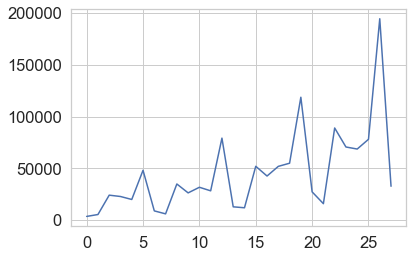

In [54]:
plt.plot(usa_t)


In [55]:
X = usa_t
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

if result[0] < result[4]["5%"]:
    print ("Reject Ho - Time Series is Stationary")
else:
    print ("Failed to Reject Ho - Time Series is Non-Stationary")

ADF Statistic: 3.271907
p-value: 1.000000
Critical Values:
	1%: -3.788
	5%: -3.013
	10%: -2.646
Failed to Reject Ho - Time Series is Non-Stationary


#### Inference:

As p_value is greater than 0.05 and ADF statistic > greater than critical value we fail to reject null hypothesis.So the time series data is non stationary

## References

#### Statistics:
 
 - https://machinelearningmastery.com/statistical-hypothesis-tests-in-python-cheat-sheet/
 - https://www.kaggle.com/hamelg/python-for-data-24-hypothesis-testing
 - https://regenerativetoday.com/a-complete-guide-to-hypothesis-testing-and-examples-in-python/

